In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("D:/Heart_Disease_Project/data/heart_disease_preprocessed.csv")
X = df.drop("num", axis=1)
y = df["num"]

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

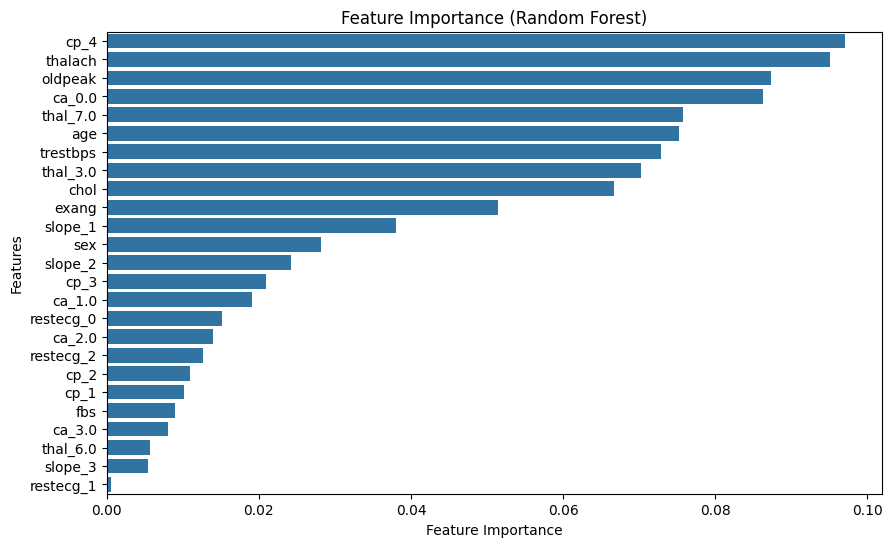

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [29]:
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features.tolist())

Selected features by RFE: ['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca_0.0', 'cp_4', 'thal_3.0', 'thal_7.0']


In [30]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_scaled, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns)
chi2_scores = chi2_scores.sort_values(ascending=False)
print("Chi-Square scores for each feature:\n", chi2_scores)

Chi-Square scores for each feature:
 thal_7.0     42.958360
cp_4         42.410097
exang        38.052613
thal_3.0     36.592219
ca_0.0       28.315601
slope_1      24.086540
cp_3         21.551109
slope_2      20.624160
ca_2.0       19.509795
cp_2         15.646367
ca_1.0       12.461167
ca_3.0       12.330323
oldpeak      11.382669
sex           7.432845
restecg_0     4.697130
restecg_2     3.987845
thal_6.0      3.133971
thalach       2.670638
cp_1          2.208198
restecg_1     1.366567
slope_3       1.073891
age           1.005896
trestbps      0.532647
fbs           0.164669
chol          0.111079
dtype: float64


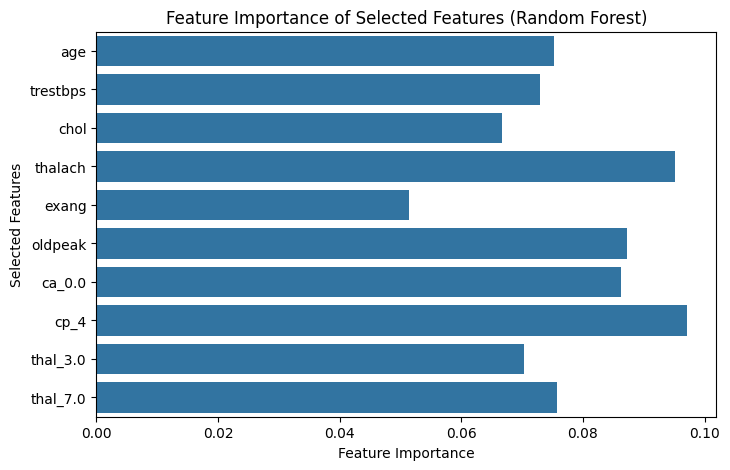

,age,trestbps,chol,thalach,exang,oldpeak,ca_0.0,cp_4,thal_3.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,0,1.087338,True,False,False,False
1,1.392002,1.611220,0.760415,-1.821905,1,0.397182,False,True,True,False
2,1.392002,-0.665300,-0.342283,-0.902354,1,1.346147,False,True,False,True
3,-1.932564,-0.096170,0.063974,1.637359,0,2.122573,True,False,True,False
4,-1.489288,-0.096170,-0.825922,0.980537,0,0.310912,True,False,True,False


In [31]:
X_reduced = X[selected_features]

plt.figure(figsize=(8, 5))
sns.barplot(
    x=feat_importances[selected_features],
    y=selected_features
)
plt.xlabel("Feature Importance")
plt.ylabel("Selected Features")
plt.title("Feature Importance of Selected Features (Random Forest)")
plt.show()

X_reduced.head()

In [ ]:
df_reduced = X_reduced.copy()
df_reduced['num'] = y.values
df_reduced.to_csv("D:/Heart_Disease_Project/data/heart_disease_reduced.csv", index=False)